# Experiment 3
We compare the real-time myoelectric interface
(see section 3) using our technique (see section 2)
and the interface proposed by
[Côté-Allard et al.](https://github.com/UlysseCoteAllard/MyoArmbandDataset),
which uses CNN with transfer learning.

This CNN's scheme comprises two networks: source and target,
which share information through an element-wise summation in
a layer-by-layer fashion. Each network has three convolutional
and two fully connected layers.

Transfer learning occurs by freezing the source network's
weights (learned using source users' data) during the target
network's training on the target user's data.

The Côté-Allard approach uses continuous wavelet transform
to extract time-frequency information from windows of 260ms.

The following figure illustrates the classification accuracy
of the Côté-Allard approach and our classifier
(both LDA and QDA) using the three publicly databases,
the Hahne feature set, and two windows (295ms and 260ms).

*Import the library developed to visualize the results*

In [1]:
import Experiments.Experiment3.VisualizationFunctions as VF3

Legend of the next figure: our QDA classifier 295ms (blue triangle markers),
our LDA classifier 295ms (blue circle markers),
our QDA classifier 260ms (orange triangle markers),
our LDA classifier 260ms (orange circle markers), and
Côté-Allard approach 260ms (orange x markers).

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


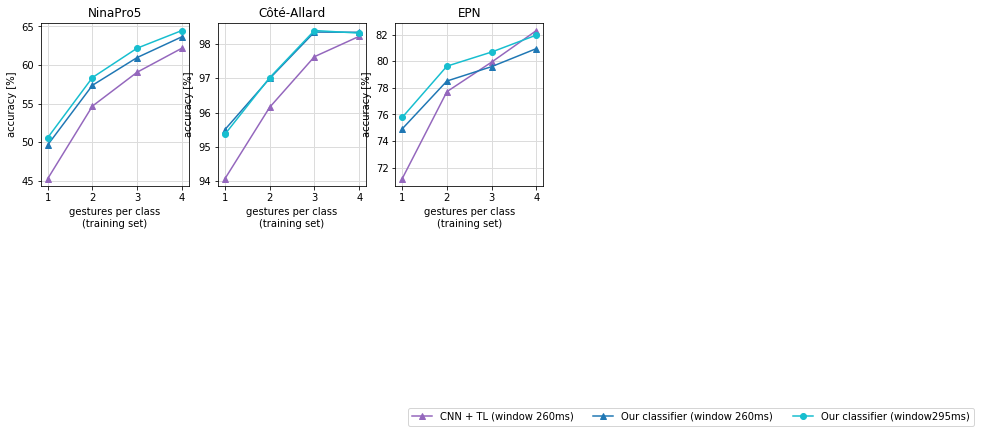

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy import stats
import ast
def uploadResults(place, samples, people, windowSize, featureSet):
    resultsTest = pd.read_csv(place + "_FeatureSet_" + str(featureSet) + "_startPerson_" + str(1) + "_endPerson_" + str(
        people) + '_windowSize_' + windowSize + ".csv")
    if len(resultsTest) != samples * people:
        print('error' + ' 1')
        print(len(resultsTest))
    return resultsTest.drop(columns='Unnamed: 0')
def AnalysisCote(placeOur260, placeOur295, placeCote, featureSet):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))
    shotsSet = np.array([1, 2, 3, 4])
    shots = len(shotsSet)

    idx = 0
    # the experiment with the CNN was perform 20 times to get more accurated results
    CoteAllardExperiment_Repetitions = 20

    for base in ['Nina5', 'Cote', 'EPN']:

        if base == 'Nina5':
            samples = 4
            people = 10
            title = 'NinaPro5'
        elif base == 'Cote':
            samples = 4
            people = 17
            title = 'Côté-Allard'
        elif base == 'EPN':
            samples = 25
            people = 30
            title = base
        DataFrame260 = uploadResults(placeOur260 + base, samples, people, windowSize='260', featureSet=featureSet)
        DataFrame295 = uploadResults(placeOur295 + base, samples, people, windowSize='295', featureSet=featureSet)

        vectOurQDA260 = np.zeros(shots)
        vectOurLDA260 = np.zeros(shots)
        vectOurQDA295 = np.zeros(shots)
        vectOurLDA295 = np.zeros(shots)
        vectCote = np.zeros(shots)
        for s in range(1, shots + 1):
            place = placeCote + "Cote_CWT_" + base + "/results/"
            cote = pd.read_csv(place + "Pytorch_results_" + str(s) + "_cycles.csv", header=None)
            coteResults = []

            if base == 'Nina5':
                for i in range(people):
                    coteResults.append(np.array(ast.literal_eval(cote.loc[0][i])).T[0].mean())
                coteResults = np.array(coteResults)
            elif base == 'EPN':
                for i in range(CoteAllardExperiment_Repetitions):
                    coteResults.append(ast.literal_eval(cote.loc[0][i]))
                coteResults = np.mean(np.array(coteResults), axis=0)
            elif base == 'Cote':
                for i in range(CoteAllardExperiment_Repetitions):
                    coteResults.append(ast.literal_eval(cote.loc[0][i]))
                    coteResults.append(ast.literal_eval(cote.loc[1][i]))
                coteResults = np.mean(np.array(coteResults), axis=0)

            vectOurLDA260[s - 1] = np.mean(DataFrame260['AccLDAProp'].loc[(DataFrame260['# shots'] == s)].values) * 100
            vectOurQDA260[s - 1] = np.mean(DataFrame260['AccQDAProp'].loc[(DataFrame260['# shots'] == s)].values) * 100
            vectOurLDA295[s - 1] = np.mean(DataFrame295['AccLDAProp'].loc[(DataFrame295['# shots'] == s)].values) * 100
            vectOurQDA295[s - 1] = np.mean(DataFrame295['AccQDAProp'].loc[(DataFrame295['# shots'] == s)].values) * 100
            vectCote[s - 1] = np.mean(coteResults)

        ax[idx].grid(color='gainsboro', linewidth=1)
        ax[idx].set_axisbelow(True)

        ax[idx].plot(shotsSet, vectCote, marker='^', label='CNN + TL (window 260ms)', color='tab:purple')
        # ax[idx].plot(shotsSet, vectOurLDA260, marker='o', label='Our LDA classifier (window 260ms)', color='tab:orange')
        ax[idx].plot(shotsSet, vectOurQDA260, marker='^', label='Our classifier (window 260ms)', color='tab:blue')
        # ax[idx].plot(shotsSet, vectOurLDA295, marker='o', label='Our LDA classifier (window 295ms)', color='tab:blue')
        ax[idx].plot(shotsSet, vectOurQDA295, marker='o', label='Our classifier (window295ms)', color='tab:cyan')
        ax[idx].yaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
        ax[idx].xaxis.set_ticks(np.arange(1, shots + .2, 1))
        ax[idx].set_xlabel('gestures per class\n(training set)')
        ax[idx].set_ylabel('accuracy [%]')
        ax[idx].set_title(title)
        idx += 1

    ax[2].legend(loc='lower center', bbox_to_anchor=(2, -1.5), ncol=3)
    fig.tight_layout(pad=0.1)
    plt.savefig("coteAcc_copy.png", bbox_inches='tight', dpi=600)
    plt.show()

    return


placeOur260='Experiments/Experiment3/results/'
placeOur295='Experiments/Experiment1/results/'
placeCote='Experiments/Experiment3/'
featureSet=1
AnalysisCote(placeOur260,placeOur295, placeCote,featureSet)

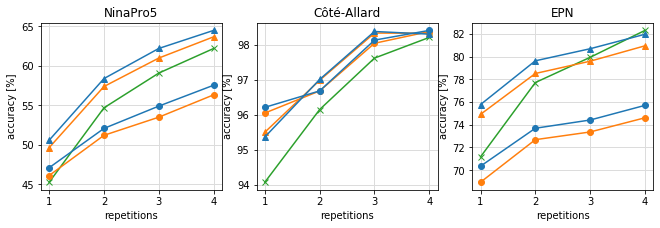

In [2]:
placeOur260='Experiments/Experiment3/results/'
placeOur295='Experiments/Experiment1/results/'
placeCote='Experiments/Experiment3/'
featureSet=1
VF3.AnalysisCote(placeOur260,placeOur295, placeCote,featureSet)

The Côté-Allard approach's performance is lower than of our
QDA classifiers (260ms and 295ms) for the three databases.
Using the Friedman rank test and the Holm post-hoc test,
our QDA classifier using windows of 295ms are best-ranked
(ranking 1.9) than the Côté-Allard approach (ranking 2.8)
with 99\% of confidence.

Our approach's data-analysis time (less than 5ms),
as shown in experiment 1, is significantly shorter than
the Côté-Allard approach's one, which is 22.5$\pm$1.2ms
(using a NVIDIA V100 GPU). Therefore, our approach is suitable
for the frequent training of real-time myoelectric interfaces
because it can analyze more sEMG data per window (295ms),
unlike the Côté-Allard approach (260ms), improving
classification accuracy (see previous figure).

In [3]:
VF3.AnalysisFriedman(placeOur260,placeOur295,placeCote,featureSet)



ANALYSIS OF WINDOW 260ms
Number of classifiers:  3 
Number of evaluations (10(people NinaPro5) x 4(shots) + 17(people Cote) x 4(shots) 30(people EPN) x 7(shots)):  228 

Should we reject H0 (i.e. is there a difference in the means) at the 95.0 % confidence level? True 

vectOurLDA260: 2.6
vectOurQDA260: 1.6
vectCote: 1.8

 The best classifier is:  vectOurQDA260
                                       p   sig
vectOurQDA260 vs vectOurLDA260  0.000000  True
vectOurQDA260 vs vectCote       0.023134  True


ANALYSIS OF WINDOW 295ms
Number of classifiers:  3 
Number of evaluations (10(people NinaPro5) x 4(shots) + 17(people Cote) x 4(shots) 30(people EPN) x 7(shots)):  228 

Should we reject H0 (i.e. is there a difference in the means) at the 95.0 % confidence level? True 

vectOurLDA295: 2.5
vectOurQDA295: 1.5
vectCote: 2.0

 The best classifier is:  vectOurQDA295
                                           p   sig
vectOurQDA295 vs vectOurLDA295  0.000000e+00  True
vectOurQDA295 vs vectCote